# Practical 2: Data Preparation

### In this practical
1. [Resuming from practical 1](#resume)
2. [Exploring data](#explore)
3. [Modifying and correcting data](#moddata)
---

**Written by Hendi Lie (h2.lie@qut.edu.au) and Richi Nayak (r.nayak@qut.edu.au). All rights reserved.**

In practical 1, you installed Anaconda, learned how to import and view basic information about the **Veteran** dataset (e.g., data dimensionality) using the iPython interpreter. This practical note introduces you to more data insights functions to perform data preparation using Python libraries we installed earlier.

Data preparation is the most important step in any data mining project. It determines the "make or break" of a data mining project and, it is estimated about 60% of your time will be spent on this stage. There are many processes that can be performed in data preparation, depending on the data type and algorithm of choice for modelling. In this practical, we will focus on the following steps:

1. **Understanding data:** exploring and visualising data to gain initial insights and understanding.
2. **Dealing with missing values:** missing values are detrimental to performance of data mining models.
3. **Noise and errorneous data cleaning:** similar to missing values, they can also negatively impact data mining models and analysis.
4. **Data formatting:** formatting data into a format suitable for the underlying algorithm and framework to be used. This includes setting correct roles and data types for variables based on their analytics purpose.

## 1. Resuming from practical 1 <a name="resume"></a>
In previous practical, we learned about how to load the **Veteran** dataset and review overall information about fields in the dataset. Before we start this practical, ensure your code looks like this:

In [1]:
import pandas as pd

# read the veteran dataset
df = pd.read_csv('datasets/veteran.csv')

# show all columns information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
TargetB             9686 non-null int64
ID                  9686 non-null int64
TargetD             4843 non-null float64
GiftCnt36           9686 non-null int64
GiftCntAll          9686 non-null int64
GiftCntCard36       9686 non-null int64
GiftCntCardAll      9686 non-null int64
GiftAvgLast         9686 non-null float64
GiftAvg36           9686 non-null float64
GiftAvgAll          9686 non-null float64
GiftAvgCard36       7906 non-null float64
GiftTimeLast        9686 non-null int64
GiftTimeFirst       9686 non-null int64
PromCnt12           9686 non-null int64
PromCnt36           9686 non-null int64
PromCntAll          9686 non-null int64
PromCntCard12       9686 non-null int64
PromCntCard36       9686 non-null int64
PromCntCardAll      9686 non-null int64
StatusCat96NK       9686 non-null object
StatusCatStarAll    9686 non-null int64
DemCluster          9686 non-null int64
De

In predictive data mining process, there must be a target variable whose value is to be predicted. As discussed in the previous practical, in this dataset, we aim to classify whether a person is a lapsing donor or not, corresponding to **TargetB**. We are focusing on "classification" prediction mining. We are not interested in knowing the exact amount of donation that a person will make. In other words, we will not treat this problem as “regression“ prediction problem. Therefore, we will not need **TargetD** and it will be dropped from the dataset.

## 2. Exploring data<a name="explore"></a>

Exploring and validating content of your data is a vital part of the data preparation process. By assaying the prepared data, you substantially reduce the chances of errorneous results in your analysis and gain visual insights into associations between variables. This section will guide you to find these vital insights.

Firstly, let's take a closer look on the dataset. The dataframe `.info()` output revealed a number of important information from the dataset:
1. **Number of rows (or entries)**: 9686
2. **Number of fields (or columns)**: 28
3. **Number of entries and data type for each column**: e.g. 9686 entries and integer number for Target B; 7906 entries and floating point for GiftAvgCard36.

From point three, we learned there are irregularities in some columns. For example, with 9686 rows in the whole dataset, there are only 7906 data points in `GiftAvgCard36`. This requires a deeper investigation of each column.

### 2.1. Explore column data

Assume we would like to investigate the `DemAge` column of this dataset in depth. Recall, a column in Pandas is called a Series, and there are many functions providing insights on the characteristic and distribution of the data.

> #### Essential functions for data exploration in Pandas

> * Function **pandas.Series.describe()** prints key statistics of a series, including count (number of non-missing values), mean (average), std (standard deviation), min, max, and quantiles (typically at 25%, 50%, 75%. 50% quantile is also called as median).

> * Function **pandas.Series.unique()** prints unique values in a Series. Typically used for categorical variables.

> * Function **pandas.Series.value_counts()** prints unique values and corresponding count in a Series. Also commonly used for categorical variables.

Let's start with `.describe()`. Run the following command into your iPython console.

In [2]:
# describe key statistics from DemAge column
print(df['DemAge'].describe())

count    7279.000000
mean       59.150845
std        16.516400
min         0.000000
25%        47.000000
50%        60.000000
75%        73.000000
max        87.000000
Name: DemAge, dtype: float64


To check the unique values and how many records for each value, we could use `.unique()` and `.value_counts()` functions.

In [3]:
# unique values in DemAge
print(df['DemAge'].unique())

[nan 67. 53. 47. 58. 39. 50. 45. 80. 61. 76. 41. 75. 59. 51. 31. 54. 70.
 42. 65. 81. 38. 56. 69. 52. 33. 73. 71. 29. 60. 83. 43. 35. 77. 44. 72.
 64. 34. 55. 37. 57. 46. 49. 32. 66. 87. 40. 79. 25. 63. 62. 48. 68. 86.
 23. 27. 74. 78. 85. 26.  7. 36. 82. 24. 17. 30. 84. 21. 28. 22. 19. 16.
 14.  6.  0.  2. 20. 18. 15.  4.]


In [4]:
# print number of occurences for each unique value in DemAge
print(df['DemAge'].value_counts())

73.0    216
67.0    215
75.0    203
49.0    201
57.0    187
77.0    183
55.0    182
65.0    181
47.0    179
69.0    178
71.0    173
51.0    167
79.0    165
45.0    164
74.0    162
53.0    152
59.0    150
76.0    139
43.0    138
63.0    138
81.0    136
61.0    136
50.0    131
37.0    125
41.0    124
78.0    123
80.0    123
72.0    122
70.0    116
68.0    116
       ... 
84.0     70
27.0     69
86.0     68
33.0     65
31.0     59
36.0     57
38.0     53
17.0     46
34.0     42
29.0     33
7.0      32
32.0     31
30.0     24
26.0     19
28.0     19
25.0     17
23.0     12
22.0      7
24.0      6
16.0      5
21.0      5
19.0      4
6.0       3
14.0      1
0.0       1
2.0       1
20.0      1
4.0       1
18.0      1
15.0      1
Name: DemAge, Length: 79, dtype: int64


When dealing with interval variables, typically binning (categorising values into certain ranges) is very common to allow easier interpretation. In pandas, we can do this by supplying `bins` parameter into the `.value_counts()` function.

In [5]:
# similar with above, but binned into 10 range bins for easier interpretation
print(df['DemAge'].value_counts(bins=10))

(69.6, 78.3]     1437
(60.9, 69.6]     1250
(43.5, 52.2]     1223
(52.2, 60.9]     1043
(78.3, 87.0]      932
(34.8, 43.5]      889
(26.1, 34.8]      342
(17.4, 26.1]       72
(8.7, 17.4]        53
(-0.088, 8.7]      38
Name: DemAge, dtype: int64


The output of these functions revealed a number of data problems with "DemAge" column.
1. There are only **7279** records in "DemAge" column (from `.describe()`'s count output), while the total number of records in this data set is **9686**. This indicates missing values in "DemAge". This observation is also visible through the NaN printed by `.unique()` method.
2. One record in "DemAge" has 0 as value (from the `.value_counts()` output). Logically, someone should not have age of 0. It indicates an errorneous data that needs to be removed from this column.

These problems need to be rectified before building data mining models. We will learn the techniques to fix data issues later in section 3.

Could you spot data problems in other columns using ```.describe()```, ```.unique()``` and ```.value_counts()```?

### 2.2. Grouping and plotting distributions of columns

From the previous section, you have revealed some issues with each column in this dataset. This is not enough, however, as we also need to look into interaction between two or more variables. In addition, plotting distribution of data column(s) might produce more insights on the problems in this data.

Grouping is commonly used to see whether there is a trend between two or more different fields. For example, we would like to know specific correlations between tendency to be a lapsing donor (TargetB) and age (DemAge), gender (DemGender) or median home value (DemMedHomeValue). In pandas, grouping can be performed using the `.groupby()` method. `.groupby()` will returned a grouped Series, which we can run `value_counts()`, `mean()`, `.median()` and many other Series functions on.

Let's start with age (DemAge). Run the following command to get the average age of lapsing donors vs non-lapsing donors.

In [6]:
# get the average age of donors, grouped by their lapsing information
print(df.groupby(['TargetB'])['DemAge'].mean())

TargetB
0    58.304444
1    59.979070
Name: DemAge, dtype: float64


The average age of lapsing donors is slightly higher than the non-lapsing donors.

Other than `.mean()`, we could also perform grouping with other method such as `.value_counts()` or `.median()`. Use `value_counts()` to get gender of lapsing and non-lapsing donors.

In [7]:
# get the value count of each gender
print("Raw count of genders of lapsing and non-lapsing donors")
print(df.groupby(['TargetB'])['DemGender'].value_counts())

print("------------------")

# add normalisation to get the relative frequency
print("Normalised count (percentage) of genders of lapsing and non-lapsing donors")
print(df.groupby(['TargetB'])['DemGender'].value_counts(normalize=True))

Raw count of genders of lapsing and non-lapsing donors
TargetB  DemGender
0        F            2614
         M            1963
         U             266
1        F            2609
         M            1962
         U             272
Name: DemGender, dtype: int64
------------------
Normalised count (percentage) of genders of lapsing and non-lapsing donors
TargetB  DemGender
0        F            0.539748
         M            0.405327
         U            0.054925
1        F            0.538716
         M            0.405121
         U            0.056164
Name: DemGender, dtype: float64


It seems there is an equal proportion of female/male/unknown gender donors in both lapsing and non-lapsing donors.

While all of the methods we have used so far are very useful in providing information about the data, data mining professionals commonly visualise these information in plots for easier presentation. In Python, there are many libraries to draw great data plots, such as `matplotlib`, `seaborn`, `ggplot`, `plotly` and `bokeh`. In this unit, we will use `seaborn` and `matplotlib`, two of the most popular visualisation libraries. Import both of them with the following command.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Plotting the distribution values in a field/column is a common visualization task. A number options exist in seaborn/matplotlib. For interval/numerical variables, `distplot` can be used. Let's try that for "DemAge". `distplot` is
sensitive towards missing values (which are present in "DemAge"), thus we have to drop them using `dropna()` method.

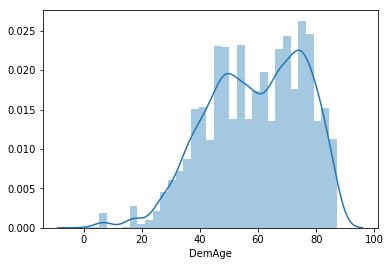

In [9]:
# To ignore any future warnings
import warnings
warnings.filterwarnings("ignore")

# dropna is used because 'DemAge' has missing values
dg = sns.distplot(df['DemAge'].dropna())
plt.show()

From the plot above, we can see most donors are between 40-80 years old, with the data distribution skewed to left.

Distribution plots are typically use only for interval/numerical variables. For nominal/categorical variables, such as `DemGender`, `countplot` is used to build a bar chart to show distribution of each values.

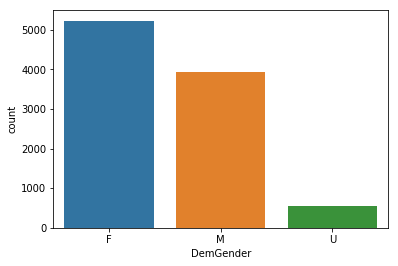

In [10]:
dg = sns.countplot(data=df, x='DemGender')
plt.show()

Lastly, we can explore the distribution of a variable using `boxplot`. Assume we would like to see the difference of home values of the donors vs non-donors. We can build a boxplot with `TargetB` as X and `DemMedHomeValue` as y.

> For more information on how to read box plot, read here:
> * http://www.statisticshowto.com/how-to-read-a-box-plot/
> * https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/


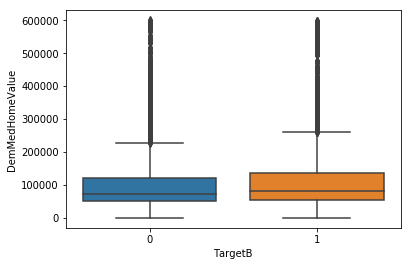

In [11]:
ax = sns.boxplot(x="TargetB", y="DemMedHomeValue", data=df)
plt.show()

The boxplot shows a slight difference of home values of lapsing and non-lapsing donors. Lapsing donors have slightly higher average and maximum home value, sign of affluence and wealth.

Could you visualize other columns using `distplot`, `countplot` and `boxplot`?

With practice, you should be able to master exploration and visualisation skill, to use specific functions suited best for a particular field.

## 3. Modifying and Correcting Data<a name="moddata"></a>

Data exploration, grouping and plotting that we performed in the previous section reveal the following problems in the dataset:
1. Incorrect type used for `DemCluster` and `DemHomeOwner`. `DemCluster` should be an categorical/nominal variable and `DemHomeOwner` should be a binary variable.
2. Errorneous/invalid values (0) in `DemMedIncome` and `DemAge`.
3. Missing values in `DemAge`, `DemMedIncome`, `GiftAvgCard36`.
4. Redundant variables in `ID` and `TargetD`.

We will now rectify these problems.

### 3.1. Setting correct type to variables

The first correction to perform is changing incorrect data types. `DemCluster` should be changed from interval (number) into categorical variable (typically represented with string). Data type of a pandas Series can be changed by simply typecasting it.

In [12]:
# change DemCluster from interval/integer to nominal/str
df['DemCluster'] = df['DemCluster'].astype(str)

Next, we have to fix `DemHomeOwner`.`.value_counts()` shows the unique values in `DemHomeOwner`.

In [13]:
df['DemHomeOwner'].value_counts()

H    5377
U    4309
Name: DemHomeOwner, dtype: int64

`DemHomeOwner` is a variable denoting whether a person is a homeowner or not (U = not having a house, H = having a house). When there are only two possible values in a variable (e.g. yes/no, female/male), it is recommended to format the variable as 0/1 binary variable. We will apply this transformation to our `DemHomeOwner` using `.map()` function, which map value "U" to 0 and "H" to 1.

In [14]:
# change DemHomeOwner into binary 0/1 variable
dem_home_owner_map = {'U':0, 'H': 1}
df['DemHomeOwner'] = df['DemHomeOwner'].map(dem_home_owner_map)

### 3.2. Correcting invalid values

The next step in cleaning our dataset is to correct invalid values in `DemMedIncome`. A `.value_counts()` reveals a large number of 0 values, which for an income data is logically impossible.

In [15]:
df['DemMedIncome'].value_counts()

0         2357
43100       10
46250        8
72339        8
48772        8
67860        7
73833        7
49277        7
57164        7
40054        7
65906        6
68819        6
44829        6
64579        6
65288        6
49337        6
55991        6
49601        6
56828        6
34619        6
87665        6
36250        6
59357        6
50000        6
97480        6
38750        6
80929        6
47580        6
47308        6
47076        6
          ... 
31820        1
50251        1
43867        1
35906        1
42047        1
59202        1
45928        1
48244        1
62589        1
42207        1
46261        1
45816        1
50395        1
102368       1
44238        1
76547        1
40136        1
56512        1
60598        1
64265        1
41770        1
46245        1
43787        1
33947        1
52370        1
40080        1
29464        1
51999        1
72485        1
41000        1
Name: DemMedIncome, Length: 4463, dtype: int64

To remove these errorneous values, we first have to create a filter to denote which row has invalid value. Here, we want to filter out any `DemMedIncome` with value less than 1. Let's create a mask based on that.

In [16]:
# denote errorneous values in DemMidIncome
mask = df['DemMedIncome'] < 1

Once we have the mask, we could use `.loc` to replace the errorneous values. As we will impute missing values in the next step, we could just denote zeroes in `DemMedIncome` as missing now. `Pandas` uses `numpy`'s `NaN` as missing value.

In [17]:
import numpy as np
df.loc[mask, 'DemMedIncome'] = np.nan

### 3.3. Imputing Missing Values

Eliminating missing values is very important in building models with `sklearn` as the algorithms in the library do not accept missing values. In this dataset, there are 3 columns with many missing values, `DemAge`, `DemMedIncome` and `GiftAvgCard36`. 

There are a number of approaches to deal with missing values, each with their own advantages and disadvantages: 
1. **Removal:** dropping rows/columns with (commonly a certain threshold of) missing values. This approach is suitable when the rows or columns removed has many missing values, thus removing them will not remove important information from the modelling process. However, when missing values only occurs sparsely in many rows/columns, this method trims much needed information from the dataset.

2. **Imputation:** filling out missing values with a specific value. Typical simple method is to impute with mean, median or mode of a variable. Recent research suggests the usage of more advanced imputation techniques, such as **multiple imputations** or **interpolation**.

3. **Flagging:** creating a new column that which denotes the missing values. The new column is typically binary, with 1 denoting missing value and 0 denoting non-missing value. This approach is used when the missing values are suspected to provide additional information. For example, in a survey about tax, wealthy people might be reluctant to provide their income. Therefore, keeping information of missing values might benefit the analysis.

In this tutorial, we will use the imputation method using mean replacement. Imputation in pandas can be performed with `.fillna()` function. We will compute mean value of each column using `.mean()` function from each series.

In [18]:
# impute missing values in DemAge with its mean
df['DemAge'].fillna(df['DemAge'].mean(), inplace=True)

# impute med income using mean
df['DemMedIncome'].fillna(df['DemMedIncome'].mean(), inplace=True)

# impute gift avg card 36 using mean
df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean(), inplace=True)

### 3.4. Dropping Unnecessary Variables

The next step in this data preprocessing is to drop `ID` and `TargetD`. `sklearn` modelling algorithms do not need information about `ID` to build a model. Meanwhile, `TargetD` is dropped because we will focus on classification task of predicting `TargetB`. `TargetD` can be used in another project focusing on regression.

In [19]:
# drop ID and the unused target variable
df.drop(['ID', 'TargetD'], axis=1, inplace=True)

### 3.5. Formatting Categorical Variable

The last step we need to perform is to convert categorical variables into binary variables. This conversion process is commonly referred as **one-hot encoding**. One-hot encoding is performed in this tutorial because `sklearn` models only accept numerical matrices as input. However, many other modelling framework (e.g. SAS) can work with categorical variables or perform one-hot encoding internally, therefore this step is not always performed.

In pandas, one-hot encoding is performed using `.get_dummies()`. An example of this process is given below.

In [20]:
# for gender, before one hot encoding. .head() is used to display first 5 records.
print(df['DemGender'].head(5))

0    F
1    F
2    M
3    M
4    M
Name: DemGender, dtype: object


In [21]:
# after one hot encoding
demo_df = pd.get_dummies(df['DemGender'])
demo_df.head(5)

,F,M,U
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


To perform one-hot encoding on all data, we can simply run `.get_dummies()` on the whole DataFrame. It automatically converts the categorical variables into binary, while excluding the interval variables. The drawback of this process is the number of variables/columns will increase significantly, which adds more complexity to the modelling process.

In [22]:
# one hot encoding all categorical variables
# all numerical variables are automatically excluded
# number of columns after the conversion should increase significantly
print("Before:", len(df.columns))

# one hot encoding
df = pd.get_dummies(df)

print("After:", len(df.columns))

Before: 26
After: 86


### 3.6. Wrapping up

That is all data preprocessing that we need to perform on this dataset. To make this process easier for next time, it is recommended to wrap all of the code in a function (let's call it `data_prep`). As we will call this function quite frequently in the next practicals, I also suggest you to put it in a file that is accessible from anywhere in our project folder (`dm_tools.py` in this tutorial).

In [23]:
# dm_tools.py
import numpy as np
import pandas as pd

def data_prep():
    # read the veteran dataset
    df = pd.read_csv('datasets/veteran.csv')
    
    # change DemCluster from interval/integer to nominal/str
    df['DemCluster'] = df['DemCluster'].astype(str)
    
    # change DemHomeOwner into binary 0/1 variable
    dem_home_owner_map = {'U':0, 'H': 1}
    df['DemHomeOwner'] = df['DemHomeOwner'].map(dem_home_owner_map)
    
    # denote errorneous values in DemMidIncome
    mask = df['DemMedIncome'] < 1
    df.loc[mask, 'DemMedIncome'] = np.nan
    
    # impute missing values in DemAge with its mean
    df['DemAge'].fillna(df['DemAge'].mean(), inplace=True)

    # impute med income using mean
    df['DemMedIncome'].fillna(df['DemMedIncome'].mean(), inplace=True)

    # impute gift avg card 36 using mean
    df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean(), inplace=True)
    
    # drop ID and the unused target variable
    df.drop(['ID', 'TargetD'], axis=1, inplace=True)
    
    df = pd.get_dummies(df)
    
    return df

### we can import it like this for the remaining of the practicals
# from dm_tools import data_prep

## End notes

This practical introduces techniques to perform data cleaning and preprocessing using Python library `pandas`. We also learned basic methods to visualise data distribution using `seaborn` and `matplotlib`. All of the preprocessing steps are wrapped in `dm_tools.data_prep()` to be used in the next practicals.